# The Influence of Specific Risk Factors for Cardiovascular Disease across the United States

# Overview

Our project focuses on analyzing how different factors and lifestyle choices play a role in the development of cardiovascular disease, and the rate of these diseases in different regions of the United States.

We combined and analyzed datasets containing demographic attributes and lifestyle habits to see what their correlation to cardiovascular disease is, after which we then applied these metrics to better understand why some regions in the U.S. might be experiencing higher levels of cardiovascular disease than others.

After cleaning the data and running several tests on each of the attributes in our data, we found that biological factors such as blood pressure, cholesterol, and age played a greater role in probablity of someone developing cardiovascular disease, while lifestyle choices such as a person's smoking status, whether or not they drank, and how physically active they were, showed no meaningful effect. We also found that states with the highest percentages of coronary heart disease also suffered from higher levels of the biological factors mentioned above.

# Names

- Member 1
- Matthew Gustafson
- Member 3
- Member 4
- Member 5

<a id='research_question'></a>
# Research Question

How does one's risk of cardiovascular disease change depending on their lifestyle choices? Are certain regions of the United States more prone to these risks than others, and why might that be?

<a id='background'></a>

## Background & Prior Work

Staying physically active is one of the best ways to ensure a healthy lifestyle and avoid certain illnesses. However, as more people shift from more physically demanding jobs to those that can accomplished simply by sitting at a desk, coupled with the rise of technology keeping us in one place and the ongoing COVID-19 pandemic forcing many people to stay indoors most of the time, it is certainly possible that modern lifestyle changes are consequently increasing the average person’s risk of debilitating illnesses such as cardiovascular (CV) disease. 

On the topic of sedentary living, the New York State Department of Health reports that people are at least 30-50% more likely to experience high blood pressure if they do not exercise regularly [1]. The risk factor of inactivity for CV disease is now becoming as high as the risk factor of smoking, given that in the United States, twice as many adults are inactive compared to adults smoking. As health advisories against harmful substances like cigarettes reduce the rate of risky behaviors such as smoking, could that inadvertently be leaving the issue of inactivity unaddressed with regards to rates of CV disease?

On the topic of career paths in relation to CV disease, the CDC has shown that people working in blue-collar, service-oriented jobs such as wholesale, transportation, utilities, etc, were more likely to suffer a heart attack or stroke compared to those in white-collar jobs such as finance, science, education, etc [2]. However, the CDC also reported the difference in CV disease rates between employed and unemployed people and found that unemployed people were 32% more likely to experience heart disease compared to people employed in a single occupation. 

With the rise of remote learning/work due to the pandemic, the sedentary lifestyle is now being linked to our very careers in greater spades than ever before. Amidst the conveniences that remote work can provide with regards to commuting, schedule flexibility, etc, could this new shift in our work behaviors possibly be making us at greater risk for CV disease?

References:
- 1) The New York State Department of Health 
    https://www.health.ny.gov/diseases/chronic/cvd.htm#:~:text=Less%20active%2C%20less%20fit%20persons,blood%20pressure%2C%20and%20elevated%20cholesterol
    
    
- 2) Center for Disease Control via Workopolis
    
    https://careers.workopolis.com/advice/the-jobs-that-are-most-likely-to-kill-you-2/#:~:text=According%20to%20the%20Center%20for,than%20workers%20in%20other%20professions

# Hypothesis


We believe that as someone has more health-conscious resources at their disposal (in part thanks to their career choices), such as being able to afford healthier foods to reduce cholesterol and blood glucose levels, their risk of cardiovascular disease will lower up to a certain point. We believe that factors such as a sedentary lifestyle or added stressors from a high-paying, strenuous job (possibly visible through higher blood pressure) will lessen the health-conscious benefits gained from said high-paying job.

Additionally, we believe that we will see these factors amplified in the past year due to the sedentary lifestyles forced upon people due to COVID-19.

# Dataset(s)

**Dataset #1:**
- Dataset Name: Cardiovascular diseases dataset (clean)
- Link to the dataset: https://www.kaggle.com/aiaiaidavid/cardio-data-dv13032020
- Number of observations: 68,783

*Information submitted for each observation includes physical characteristics such as age, gender, weight, and height, as well information about participants’ blood pressure, cholesterol and glucose levels. Finally, the data has information on whether or not the participant smokes or drinks alcohol, two well known risk factors for cardiovascular disease.*

**Dataset #2:**
- Dataset Name: 500 Cities: Coronary heart disease among adults aged >=18 years
- Link to the dataset: https://chronicdata.cdc.gov/500-Cities-Places/500-Cities-Coronary-heart-disease-among-adults-age/cqcq-r6f8
- Number of observations: 29,006 (500 after cleaning)

*Information submitted for each observation includes the year the observation was taken, the state, city, and census tract from which the observation took place, and the Crude Prevalence and Age-Adjusted Prevalence rates of coronary heart disease among adults aged 18+ in each of these cities, plus the low and high confidence limits for these rates. Note that the District of Columbia is also included here.*

As we are using multiple datasets, we plan to use each of these datasets to answer a particular part of our research question. Our first dataset will help us find patterns between individual lifestyle choices and risk of cardiovascular disease, while our second dataset will help determine what regions are more prone to cardiovascular disease as a whole. By combining the two different sources of information, we will hopefully be able to understand why certain regions in dataset #2 suffer from higher rates of cardiovascular disease.

# Setup

In [1]:
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(style="white", font_scale=1.5)

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# set plotting size parameter
plt.rcParams['figure.figsize'] = (8, 4)

# make sure pandas & numpy are imported
import pandas as pd
import numpy as np

# Statmodels & patsy
import patsy
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import skewnorm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

# Data Cleaning

### Cleaning steps for Dataset #1

In [2]:
# Read the csv file for Dataset #1 and examine a sample
data1 = pd.read_csv('cardiovascular_diseases_dv3.csv')
data1['GENDER'] = data1['GENDER'] - 1
data1['CHOLESTEROL'] = data1['CHOLESTEROL'] - 1
data1['GLUCOSE'] = data1['GLUCOSE'] -1
data1.head()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,1,168,62,110,80,0,0,0,0,1,0
1,55,0,156,85,140,90,2,0,0,0,1,1
2,52,0,165,64,130,70,2,0,0,0,0,1
3,48,1,169,82,150,100,0,0,0,0,1,1
4,48,0,156,56,100,60,0,0,0,0,0,0


By looking at the description of dataset 1 in Kaggle (and adjusting labels to fit with our cleaning), we get a better idea of what each of the variables are supposed to represent:
- AGE:  integer (years of age)
- HEIGHT: integer (cm) 
- WEIGHT: integer (kg)
- GENDER: categorical (0: female, 1: male)
- AP_HIGH: systolic blood pressure, integer
- AP_LOW: diastolic blood pressure, integer 
- CHOLESTEROL: categorical (0: normal, 1: above normal, 2: well above normal)
- GLUCOSE: categorical (0: normal, 1: above normal, 2: well above normal)
- SMOKE: categorical (0: no, 1: yes)
- ALCOHOL: categorical (0: no, 1: yes)
- PHYSICAL_ACTIVITY: categorical (0: no, 1: yes)
- CARDIO_DISEASE:  categorical (0: no, 1: yes)

We see that AGE, HEIGHT, WEIGHT, and AP_HIGH/AP_LOW are numerical data, while the remaining variables are all categorical data.

### Cleaning steps for Dataset #2

In [3]:
# Read the csv file for Dataset #2
data = pd.read_csv('500_Cities__Coronary_heart_disease_among_adults_aged___18_years.csv')

# Include only cities and age-adjusted prevalence rates for observations
data = data[(data['GeographicLevel'] == 'City') & (data['DataValueTypeID'] == 'AgeAdjPrv')]

# Include only the necessary columns for analysis
data_trimmed = data[['Year', 'StateAbbr', 'StateDesc', 'CityName', 'Measure', 'Data_Value_Unit', 'Data_Value_Type', 
                     'Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'PopulationCount']].reset_index()

In [4]:
# Display sample from Dataset #2
data_trimmed.head()

,index,Year,StateAbbr,StateDesc,CityName,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount
0,0,2017,CA,California,Hayward,Coronary heart disease among adults aged >=18 ...,%,Age-adjusted prevalence,4.8,4.7,4.8,144186
1,4,2017,CA,California,Bellflower,Coronary heart disease among adults aged >=18 ...,%,Age-adjusted prevalence,5.3,5.2,5.4,76616
2,9,2017,FL,Florida,Cape Coral,Coronary heart disease among adults aged >=18 ...,%,Age-adjusted prevalence,6.3,6.2,6.4,154305
3,16,2017,KS,Kansas,Kansas City,Coronary heart disease among adults aged >=18 ...,%,Age-adjusted prevalence,7.1,7.0,7.1,145786
4,28,2017,OH,Ohio,Parma,Coronary heart disease among adults aged >=18 ...,%,Age-adjusted prevalence,6.0,5.8,6.1,81601


# Data Analysis & Results

## EDA

### Description of Continous Variables in Dataset 1

In [5]:
data1[['AGE', 'HEIGHT', 'WEIGHT', 'AP_HIGH', 'AP_LOW']].describe()

,AGE,HEIGHT,WEIGHT,AP_HIGH,AP_LOW
count,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000
mean,53.326781,164.361252,74.121934,126.614585,81.381591
std,6.768163,8.184850,14.331392,16.763763,9.676679
min,30.000000,55.000000,11.000000,60.000000,40.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000
50%,54.000000,165.000000,72.000000,120.000000,80.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000
max,65.000000,250.000000,200.000000,240.000000,190.000000


According to our data:
- The average age of subjects in our dataset is **~53 years old**
- The average height of subjects is **164.36 cm**
- The average weight of subjects is **74.12 kg**
- The average systolic blood pressure of subjects is **126.61**
- The average diastolic blood pressure of subjects is **81.38**

### Description of Continuous Variables of Dataset 2

In [6]:
data_trimmed.describe()

,index,Year,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount
count,500.000000,500.0,500.000000,500.000000,500.000000,5.000000e+02
mean,13582.928000,2017.0,5.676000,5.573000,5.782000,2.060416e+05
std,8768.474475,0.0,1.016174,1.009619,1.018937,4.574810e+05
min,0.000000,2017.0,3.500000,3.400000,3.600000,4.241700e+04
25%,6550.000000,2017.0,4.900000,4.800000,5.000000,8.159000e+04
50%,12525.000000,2017.0,5.700000,5.600000,5.800000,1.061060e+05
75%,21656.500000,2017.0,6.400000,6.300000,6.500000,1.811278e+05
max,28998.000000,2017.0,8.800000,8.700000,8.900000,8.175133e+06


According to our data, across the country, an average of about **5.676%** of adults aged >=18 years suffer from coronary heart disease.

### Shape and Variable Types of Dataset 1

In [7]:
print('Shape: ')
print(data1.shape)
print(f'\n')

print('Types:')
print(data1.dtypes)

Shape: 
(68783, 12)


Types:
AGE                  int64
GENDER               int64
HEIGHT               int64
WEIGHT               int64
AP_HIGH              int64
AP_LOW               int64
CHOLESTEROL          int64
GLUCOSE              int64
SMOKE                int64
ALCOHOL              int64
PHYSICAL_ACTIVITY    int64
CARDIO_DISEASE       int64
dtype: object


### Shape and Variable Types of Dataset 2

In [8]:
print('Shape: ')
print(data_trimmed.shape)
print(f'\n')

print('Types:')
print(data_trimmed.dtypes)

Shape: 
(500, 12)


Types:
index                      int64
Year                       int64
StateAbbr                 object
StateDesc                 object
CityName                  object
Measure                   object
Data_Value_Unit           object
Data_Value_Type           object
Data_Value               float64
Low_Confidence_Limit     float64
High_Confidence_Limit    float64
PopulationCount            int64
dtype: object


### Categorical Variable Distributions for Dataset 1

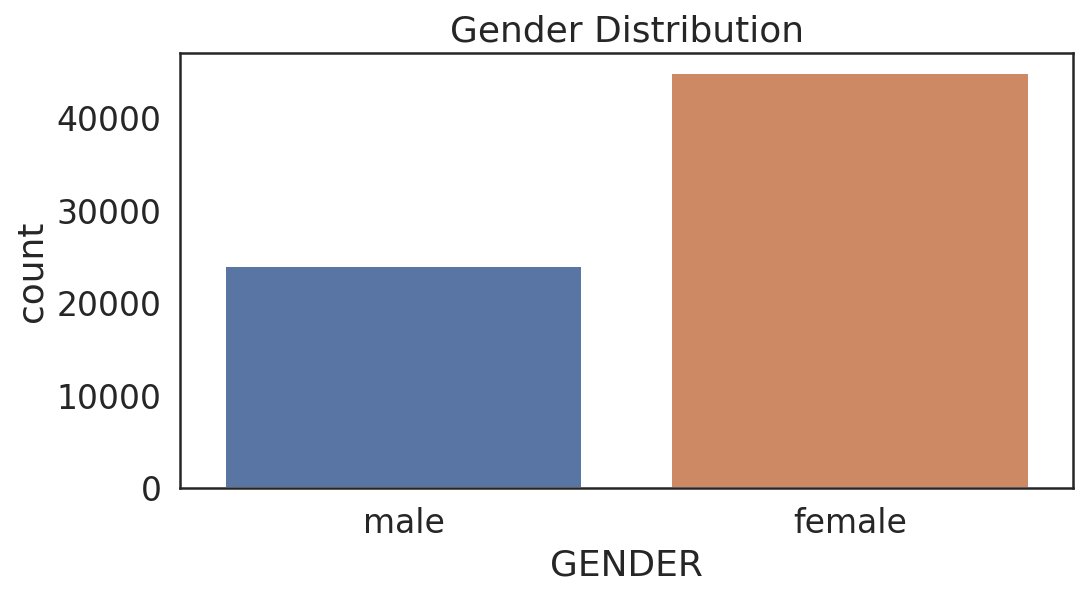

In [9]:
sns.countplot(data=data1.replace({'GENDER': {0:'female', 1:'male'}}), x='GENDER', order=['male', 'female'])
plt.title("Gender Distribution")
plt.show()

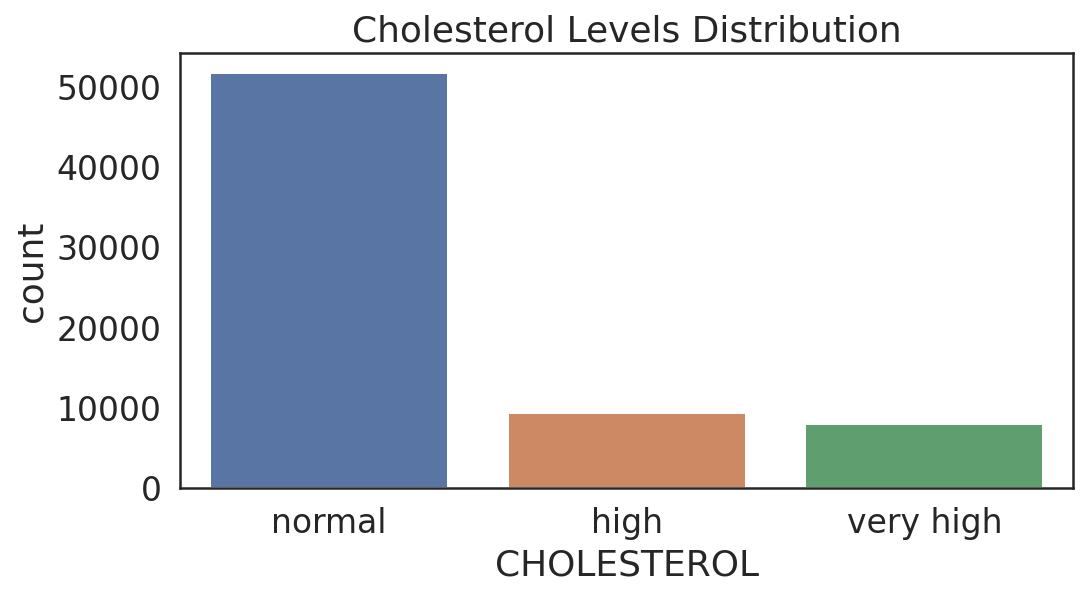

In [10]:
sns.countplot(data=data1.replace({'CHOLESTEROL': {0:'normal', 1:'high', 2:'very high'}}), x='CHOLESTEROL', 
              order=['normal', 'high', 'very high'])
plt.title("Cholesterol Levels Distribution")
plt.show()

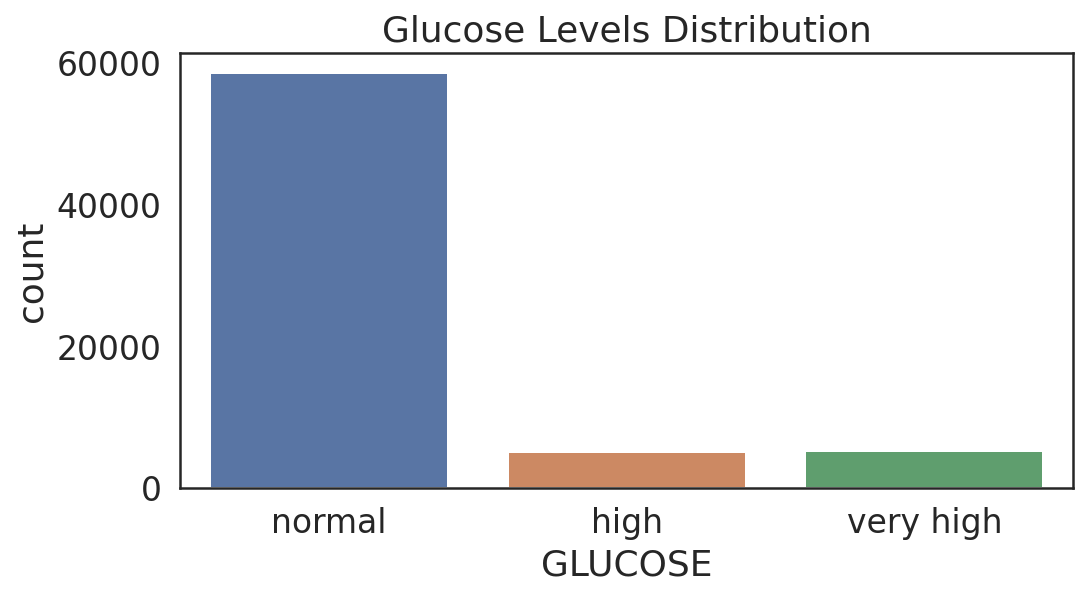

In [11]:
sns.countplot(data=data1.replace({'GLUCOSE': {0:'normal', 1:'high', 2:'very high'}}), x='GLUCOSE', 
              order=['normal', 'high', 'very high'])
plt.title("Glucose Levels Distribution")
plt.show()

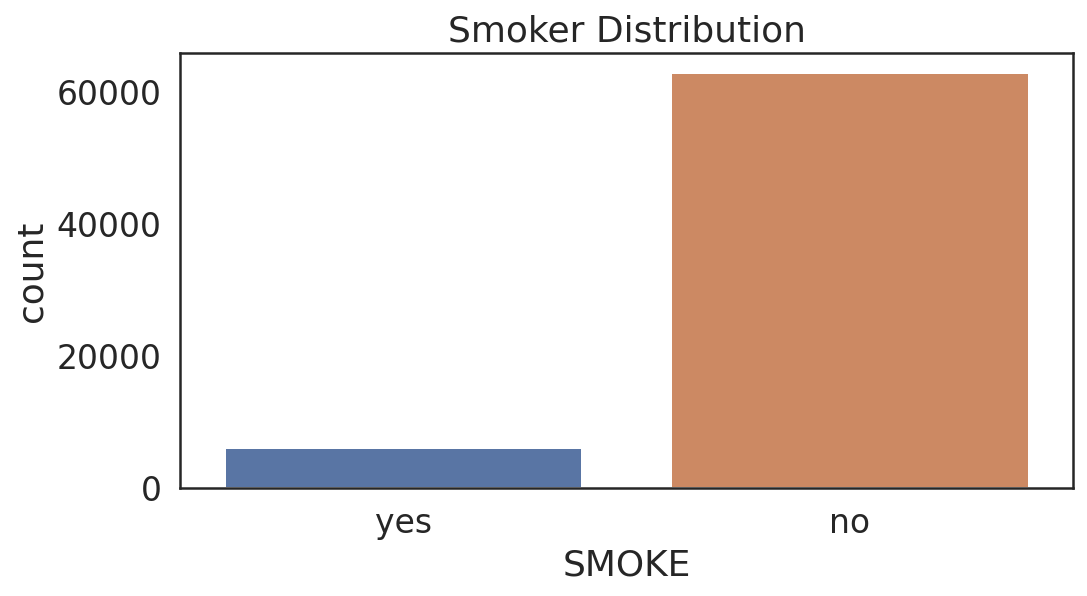

In [12]:
sns.countplot(data=data1.replace({'SMOKE': {0:'no', 1:'yes'}}), x='SMOKE', order=['yes', 'no'])
plt.title("Smoker Distribution")
plt.show()

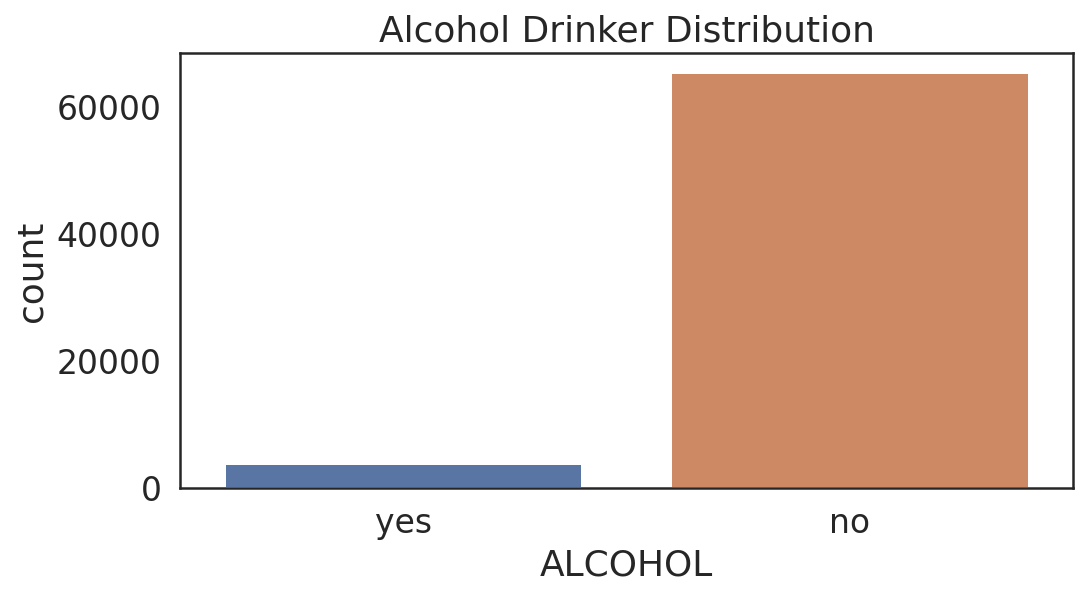

In [13]:
sns.countplot(data=data1.replace({'ALCOHOL': {0:'no', 1:'yes'}}), x='ALCOHOL', order=['yes', 'no'])
plt.title("Alcohol Drinker Distribution")
plt.show()

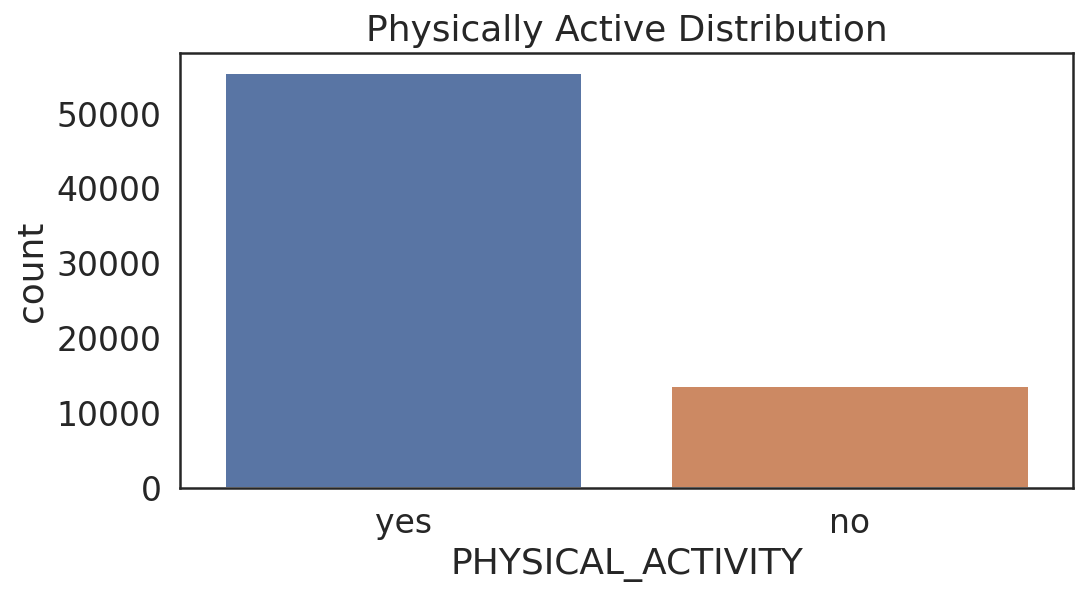

In [14]:
sns.countplot(data=data1.replace({'PHYSICAL_ACTIVITY': {0:'no', 1:'yes'}}), x='PHYSICAL_ACTIVITY', order=['yes', 'no'])
plt.title("Physically Active Distribution")
plt.show()

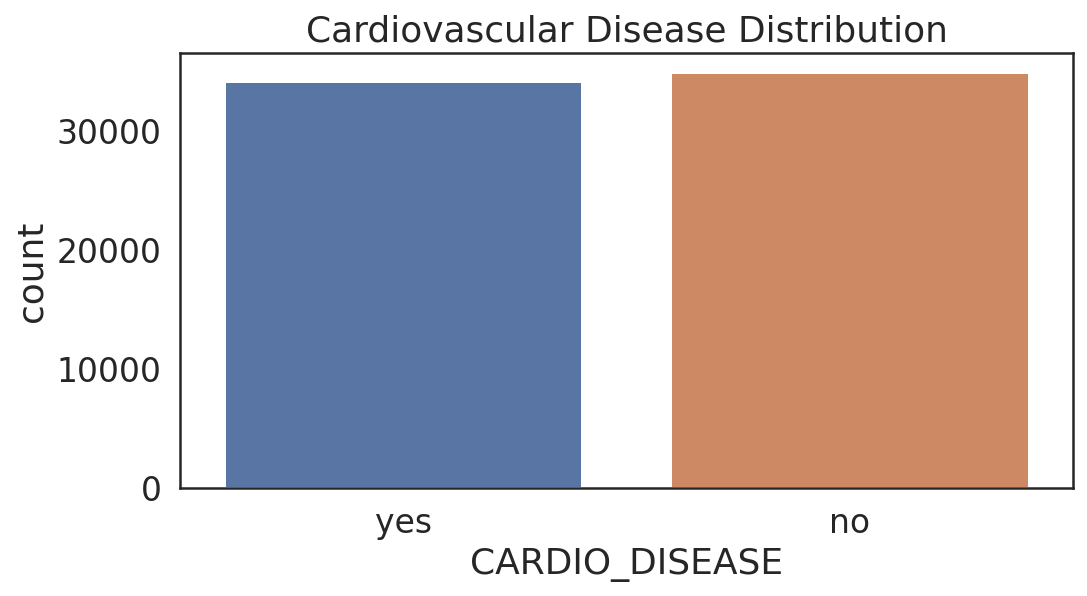

In [15]:
sns.countplot(data=data1.replace({'CARDIO_DISEASE': {0:'no', 1:'yes'}}), x='CARDIO_DISEASE', order=['yes', 'no'])
plt.title("Cardiovascular Disease Distribution")
plt.show()

From an immediate glance, we can see some interesting features. For example, the number of people who smoke, drink, and are not physically active is *much* smaller than the rest of the subjects. Yet, the distribution of people with and without cardiovascular disease is almost 50/50. This may infer that these categorical variables may not be as impactful on whether or not a person will suffer from cardiovascular disease as other factors.

## Analysis

### For Dataset 1:

The independent variables in Dataset 1 are largely categorical; thus, tasks focusing on inference and classification are our best options for analyzing this dataset. Our goal is to see how much the predictors in Dataset 1 influence the outcome of our dependent variable (CARDIO_DISEASE), and whether or not considering these predictors together is an accurate way to predict whether someone will suffer from cardiovascular disease.

First, let's take a look at the Pearson correlation (r) for Dataset 1 to see how these predictors might be related to one another:

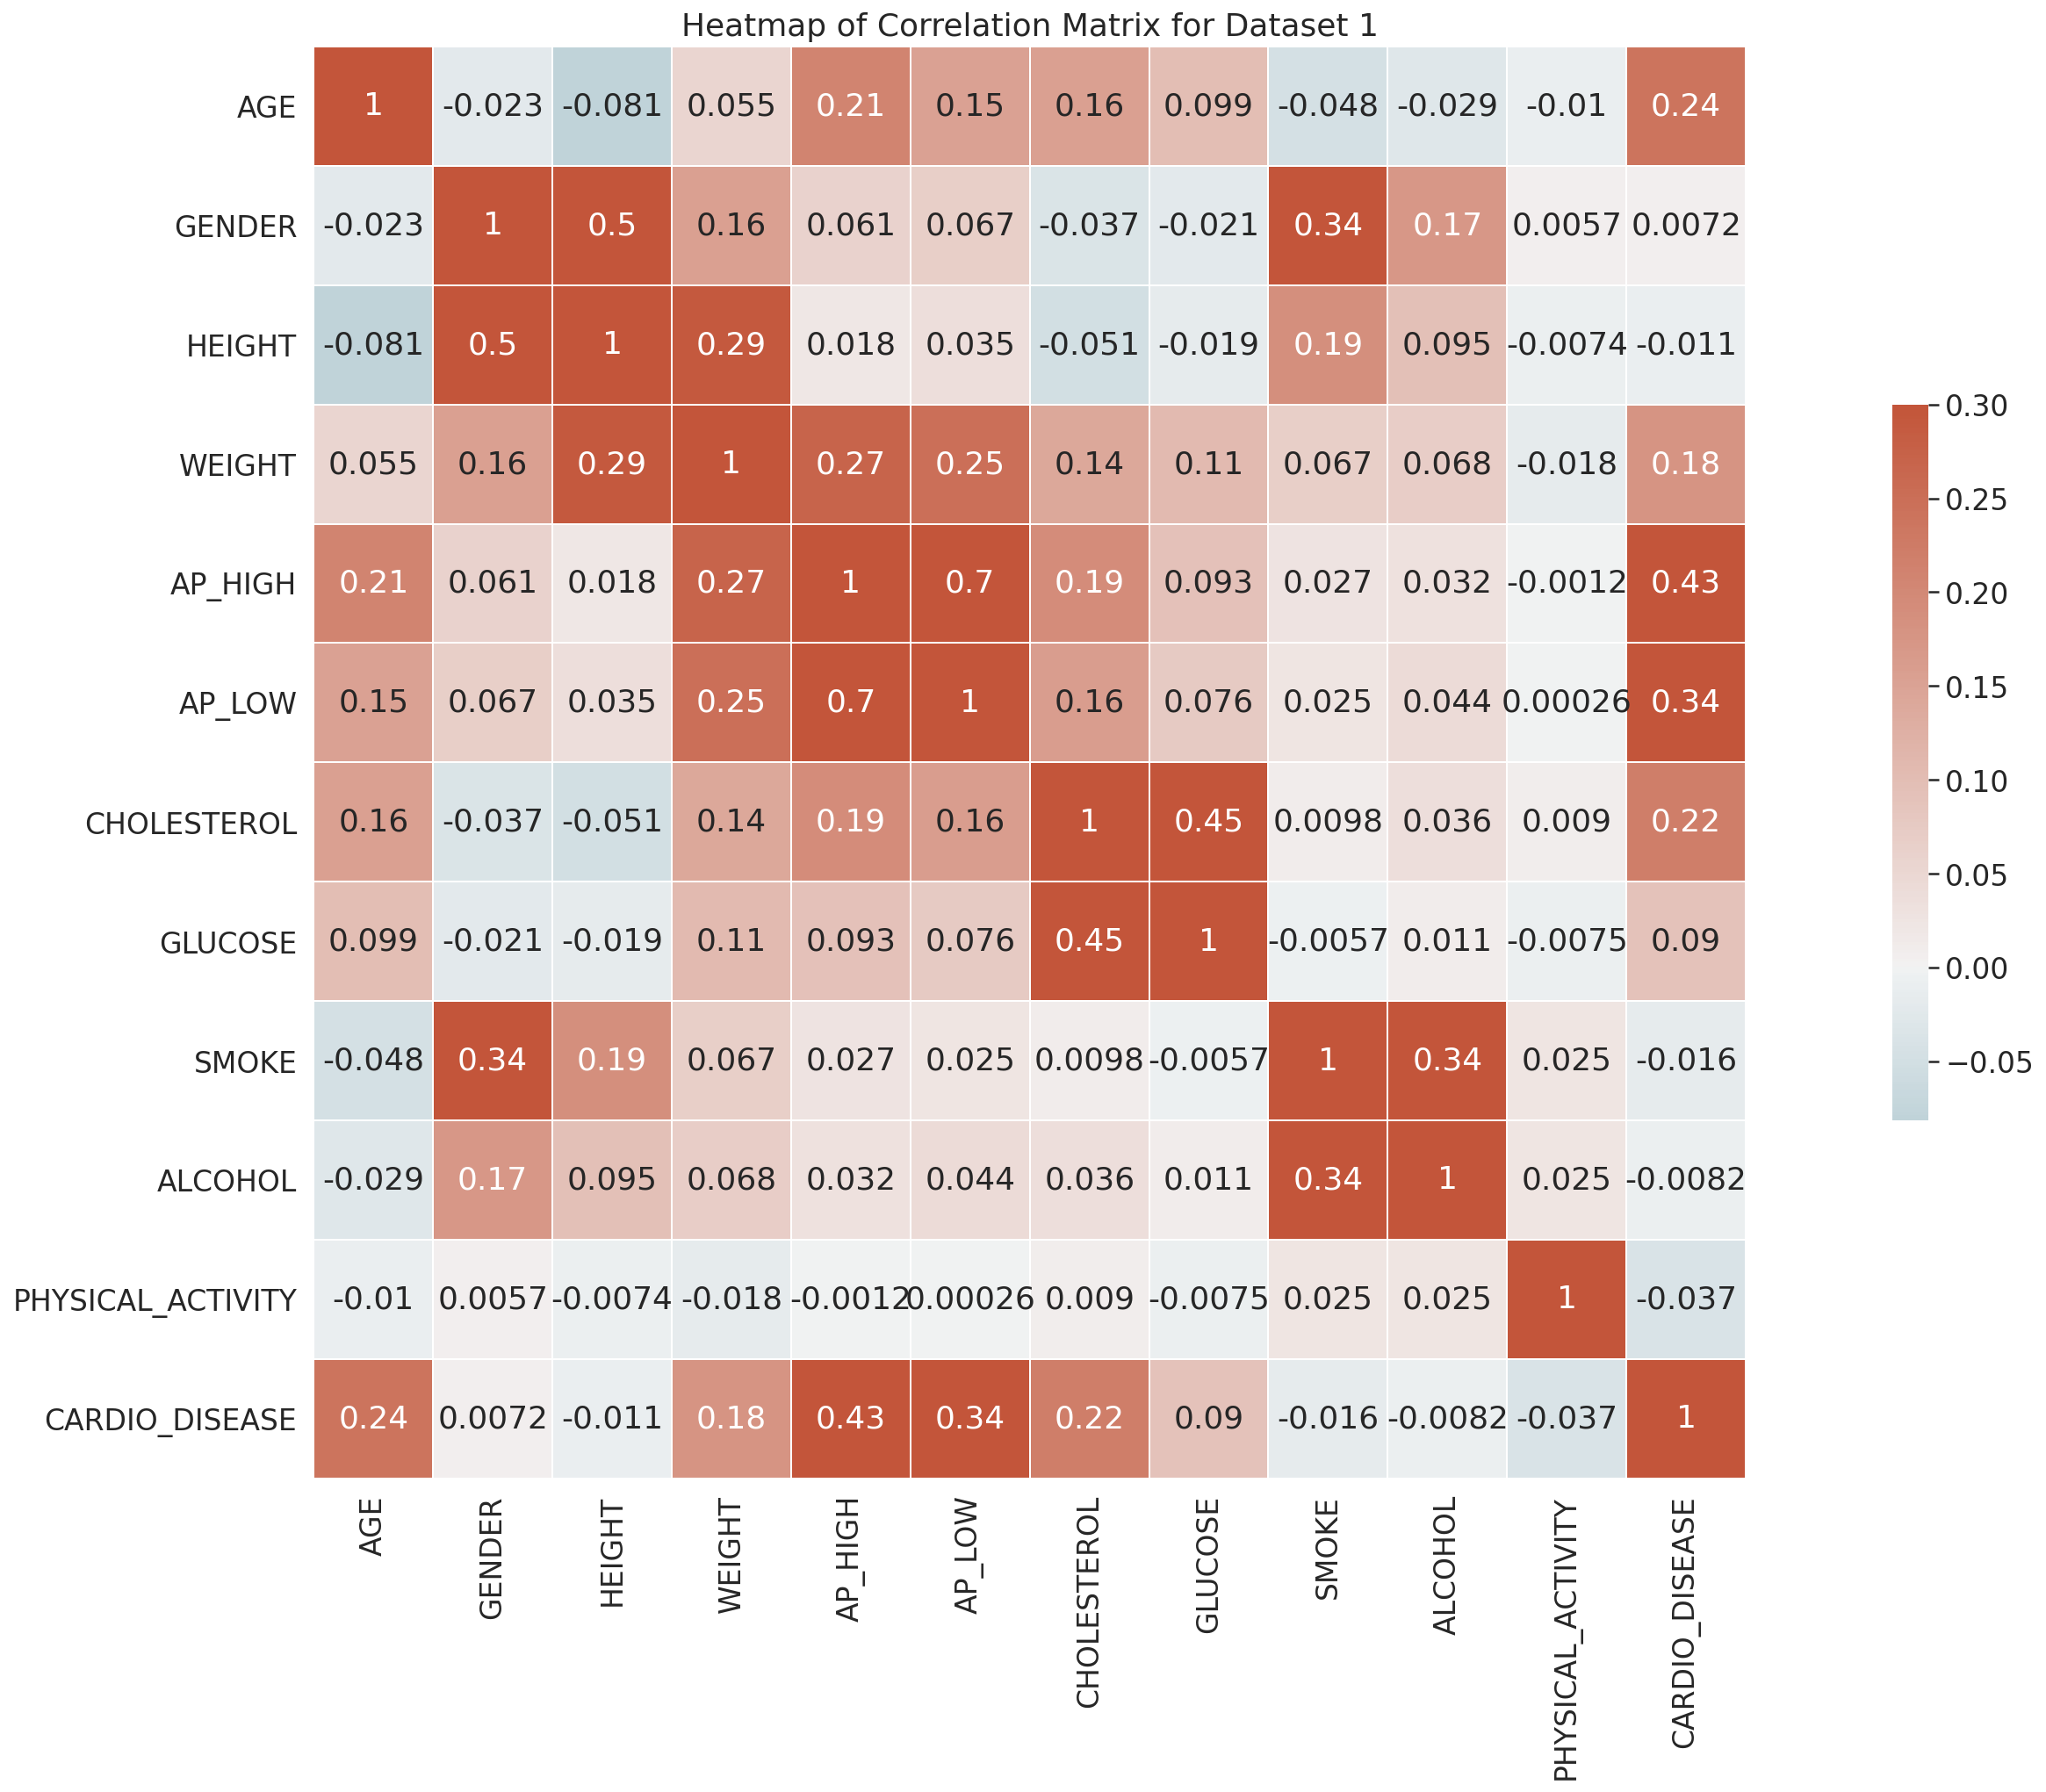

In [16]:
# Correlation matrix for dataset 1
correlation = data1.corr()

# Color mapping for heatmap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# matplotlib figure
f, ax = plt.subplots(figsize=(30, 15))

# Heatmap
sns.heatmap(correlation, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

plt.title("Heatmap of Correlation Matrix for Dataset 1")
plt.show()

We really want to focus on the bottom row of the heatmap here, as this gives us the Pearson correlation coefficient (r) for each of the predictors in our dataset in comparison to our measured variable. From this, we can see that *blood pressure* (both high and low), *age*, and *cholesterol* have a strong, **positively correlated** relationship with whether or not a person suffered from cardiovascular disease. *Weight* and *blood glucose levels* were also factors in this positive correlation, but to a lesser extent.

Surprisingly, according to this dataset, whether or not a person *smoked*, *drank alcohol*, or *exercised* had a **negative** correlation with whether or not a person had cardiovascular disease.

To further examine how accurately these lifestyle choices/biological factors can predict whether someone will suffer from cardiovascular disease in the future, we can run a **logistic regression** using a model that contains all of the predictors and check the model's accuracy after fitting. 

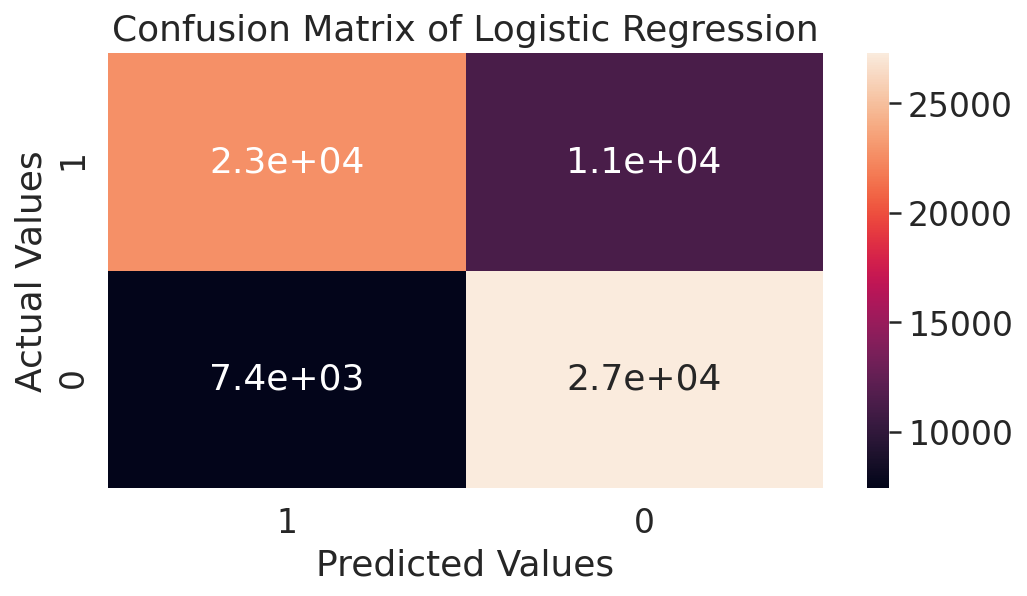

In [17]:
# Split data into output (y) and predictors (X)
y = data1['CARDIO_DISEASE']
X = data1.drop(columns=['CARDIO_DISEASE'])

# Run the logistic regression with all predictors and fit it to a model
logreg = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model = logreg.fit(X,y)

# Generate a confusion matrix for this regression
cm = confusion_matrix(y, model.predict(X))
ax = sns.heatmap(cm, annot=True)
ax.invert_yaxis()
ax.invert_xaxis()
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

Finally, we can view a classification report for our logistic regression to get a good idea of how accurate this model containing all the predictors is (i.e., how likely we are to predict that someone has cardiovascular disease given all of the predictors in the dataset).

In [18]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.71      0.79      0.74     34742
           1       0.75      0.67      0.71     34041

    accuracy                           0.73     68783
   macro avg       0.73      0.73      0.73     68783
weighted avg       0.73      0.73      0.73     68783



We see that our model has an accuracy of **0.73**. That means, when considering all of the predictors at once, we can correctly guess whether a person will suffer from cardiovascular disease about 73% of the time. It's not exactly ideal, but improving the model will take more time that we cannot dedicate to this research at this time. For now, 73% is good enough.

### For Dataset 2:

This dataset is a bit more simpler than the first one, as to analyze the necessary information for this dataset, we simply need to examine a barplot of the average percentage of coronary heart disease per state across all included cities in the dataset. The plot is generated below:

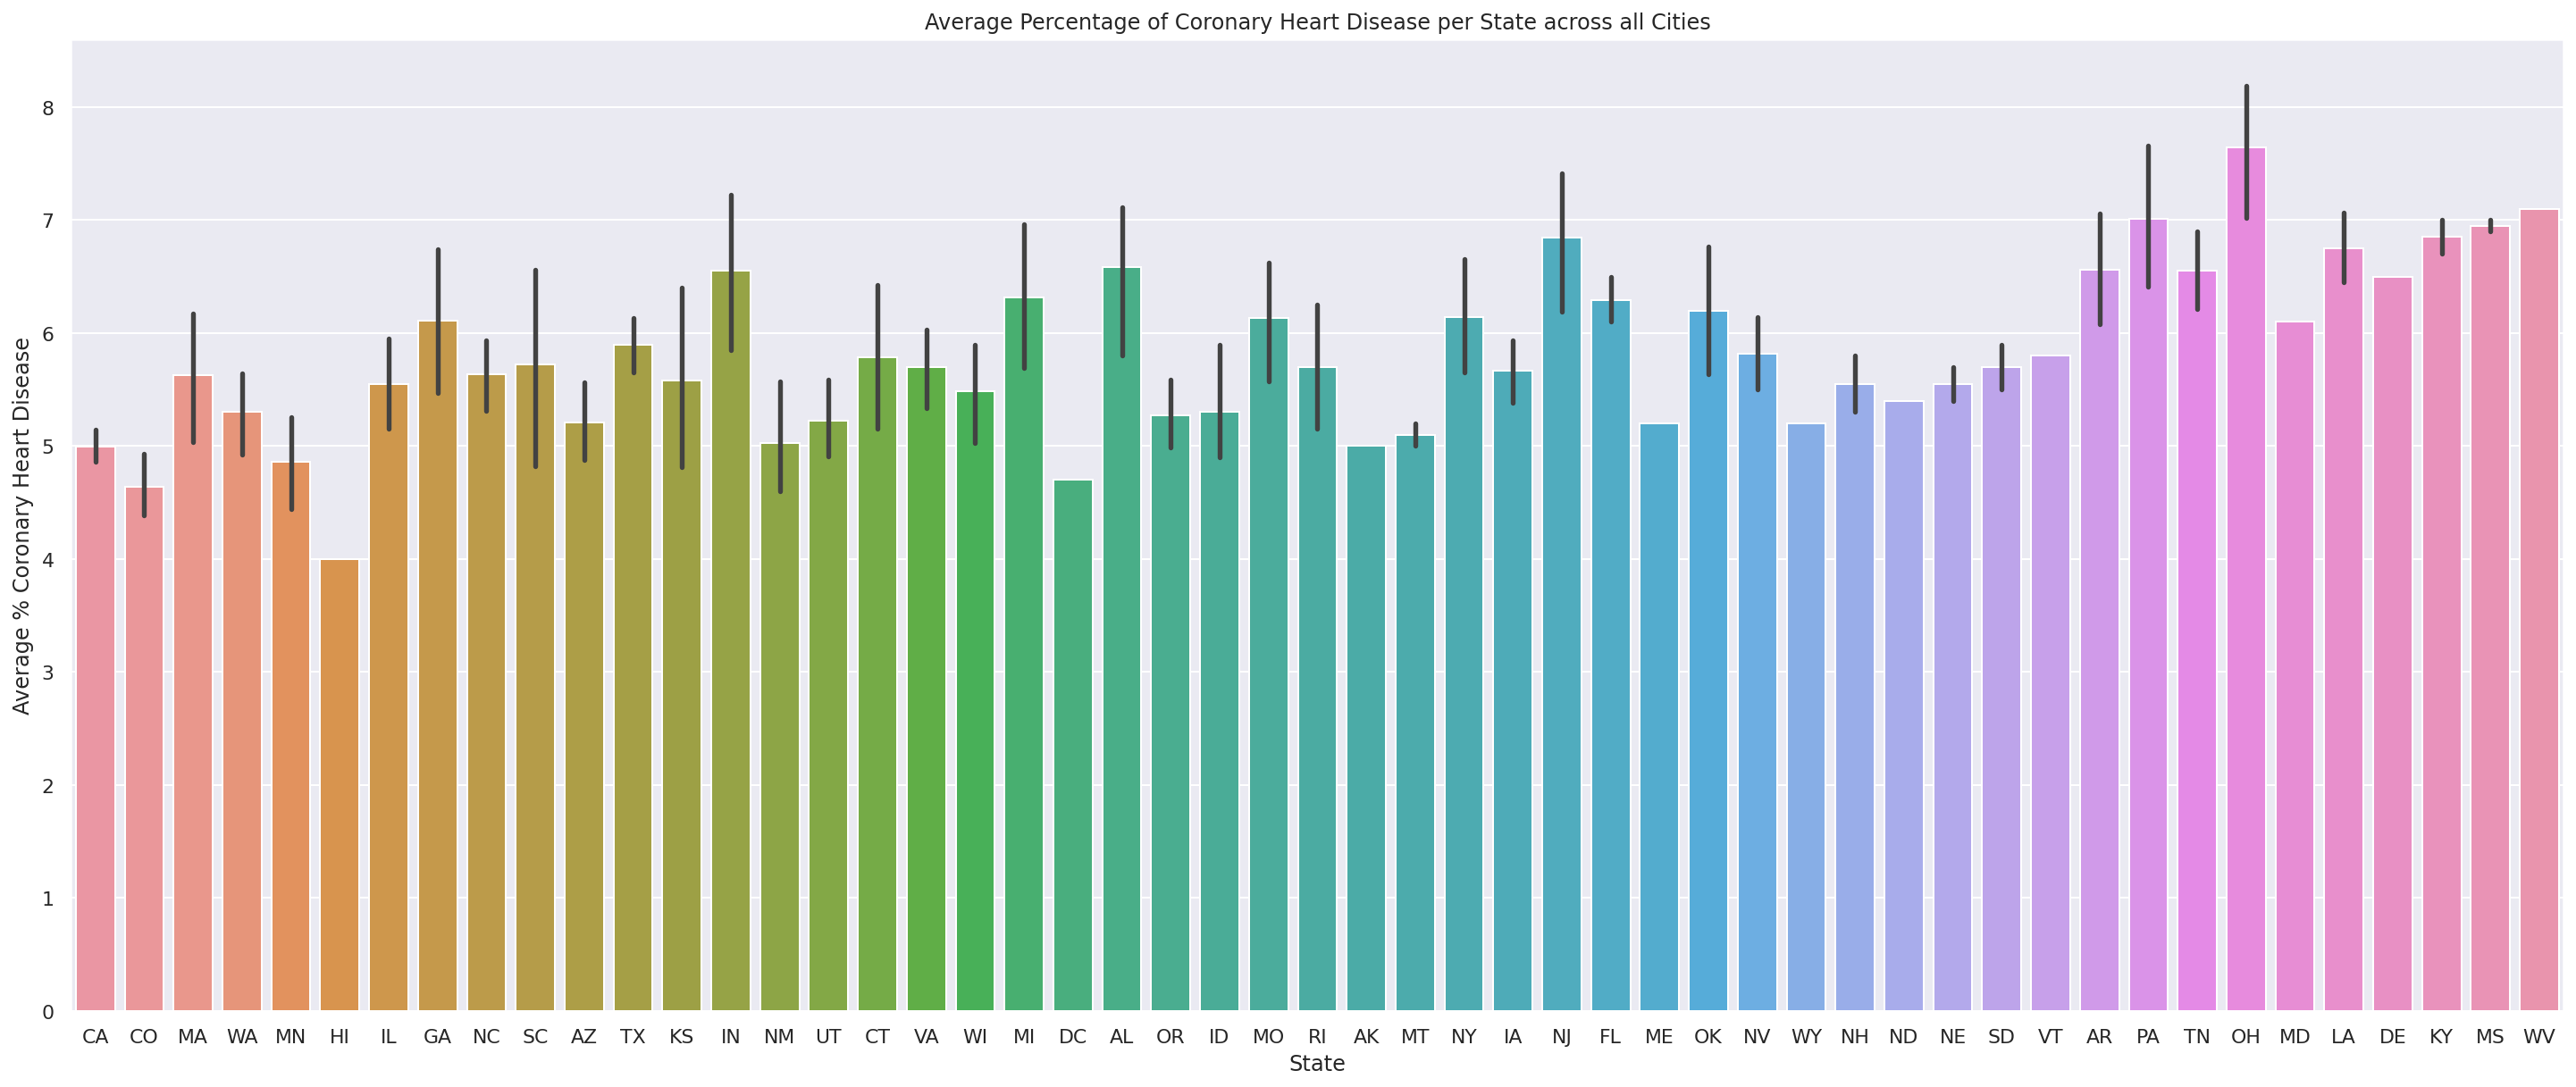

In [19]:
sns.set(rc={'figure.figsize':(25,10)})
ax = sns.barplot(x="StateAbbr", y="Data_Value", data=data_trimmed.sort_values('Data_Value'))
ax.set(xlabel='State', ylabel='Average % Coronary Heart Disease', title='Average Percentage of Coronary Heart Disease per State across all Cities')
plt.show()

Based on these averages, we can see that **Ohio, Pennsylvania, New Jersey, Alabama,** and **Indiana** were the five states with the highest percentages of coronary heart disease among adults aged >=18 years. With this data largely coming from the year 2017, we can look at rates of high blood pressure and high cholesterol across the country during that year to see if these values correlate with our findings from the first dataset.

From cartograms produced by the CDC, we see the following:

<img src="chol.png" width="500"/>

Source: https://www.americashealthrankings.org/explore/annual/measure/High_Chol/state/ALL

<img src="fs_bloodpressure.jpg" width="500"/>

Source: https://www.cdc.gov/bloodpressure/facts.htm

With some help from these images provided by the CDC, we can see that in 2017, Ohio, Pennsylvania, New Jersey, Alabama, and Indiana all suffered from fairly high levels of both cholesterol and blood pressure. This supports the conclusion we came to in analyzing Dataset 1 that cholesterol and blood pressure are strong indicators of whether or not an individual will suffer from cardiovascular disease.

# Ethics & Privacy

Our first dataset comes from an uncredited source, but it claims all values were collected at the moment of medical examination. The specifics of their data collection methods are unknown; therefore, they could have been biased towards falsely reported metrics by the patient or medical professional during time of the examination. However, we have omitted the data of outliers and unbelievable values to improve our analysis. We can assume their method of obtaining data were ethical as patient names are anonymous (even though much of the data is based off of personal life choices). This means that some agreement between the medical professional and patient were put into place that protected their privacies and identities but allowed for release of their examination's recorded data on a public domain.

The second dataset comes from a joint project involving the Center for Disease Control (CDC) in hopes of improving health and social welfare within cities and local areas. The data is publically available data and ethically collected in a confidential way protected by federal law. It includes estimates for the 500 largest US cities and approximately 28,000 census tracts within these cities. These estimates can be used to identify emerging health problems and to inform development and implementation of effective, targeted public health prevention activities. Because the small area model cannot detect effects due to local interventions, users are cautioned against using these estimates for program or policy evaluations. Potential bias can occur in the Census Bureau's data due to the nonresponse bias, as it skews the bias towards participants who consistently participate, omitting meaningful data because nothing is known about those who fail to respond to both the census and survey. This means that those who are undocumented, uneducated, and not living stably in one location may not be accounted for and included in this data.

# Conclusion & Discussion

Our overarching goal was to discover which lifestyle choices were correlated with biological predispositions for cardiovascular problems, and in what regions were these problems more common than others. Especially during a pandemic when everyone is forced to stay at home and live sedentary lifestyles, this can lead to worse lifestyle choices (binge eating, increased alcohol intake, etc.) that will worsen or cause problems for those more prone to cardiovascular diseases. From our analysis, we can see that blood pressure (both high and low), age, and cholesterol have a strong, positively correlated relationship with whether or not a person has suffered or will from cardiovascular disease. Weight and blood glucose levels were also factors in this positive correlation, but to a lesser extent. The lifestyle choices of smoking, drinking, and exercise proved to not play as a significant role in cardiovascular disease development as we originally thought, suggesting the most significant factor in cardiovascular development are biological factors. Using these factors in the creation of our model showed a 73% accuracy rate in predicting cardiovascular disease. More research and analysis could be done on the different lifestyle choices that can worsen certain cardiovascular diseases, but that would take a considerable amount of new and highly detailed medical and demographical data.

Additionally, our ability to definitively answer whether or not increases in these biological factors (cholesterol, blood pressure, etc.) due to COVID-19 have led to greater rates of cardiovascular disease (especially in certain states) was limited by not only the time we had to conduct our work on this project, but also due to the fact that recent data on cardiovascular disease in the United States is harder to obtain. Acquiring such data might require going beyond public data resources and gaining direct access to the data from the source. 

Overall, while we were able to come to some conclusions about the greatest risk factors for cardiovascular disease and how these risk factors may be reflected in certain regions of the United States, there's a lot of work remaining for more definitive answers to be reached, work that would probably take longer than a ten-week course in university may allow.

# Team Contributions

**Matthew Gustafson:** Project Manager, Background and Prior Work, found and cleaned Dataset #2, performed linear regression on Dataset #1, formatted and edited group contributions for grammar/spelling/brevity

**Member 1:** Research Question, Hypothesis, performed EDA for Dataset #2

**Member 3:** Found and cleaned Dataset #1, performed EDA for Dataset #1

**Member 4:** Overview, creation & analysis of initial plots, Conclusion, Ethics & Discussion

**Member 5:** Formed group, found initial dataset, highlighted EDA values and created plots, analyzed results related to research question